<a href="https://colab.research.google.com/github/AMRowe99/ECS_Class/blob/main/Heat_pump_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
# Import the things you need

import numpy as np
import matplotlib.pyplot as plt

# set precision of numerical values output
%precision 1

#default to show a plot instead of plt.show()
%matplotlib inline

# Heat Pump Analysis I
## Background
Heat pumps extract heat from a low temperature source and reject heat at a higher temperature. In some cases, the heat is extracted from the atmosphere where the temperature varies in accordance with the local climate - this is an "air-source" heat pump (ASHP). The input power required to drive the heat pump cycle increases as the temperature difference between source and sink increases. Heating a building in very cold climates efficiently can be difficult.

An alternative approach is to use a ground-source heat pump (GSHP) where the heat exchanger buried in the ground will see a warmer environment than the air. The ground temperature tends to increase with depth and the seasonal variation tends to decrease. Due to reduced rates of themal transport (conduction vs convection) as compared to air-source, a ground-source heat pump can decrease the local temperature due to long-duration operation and inadequate sizing of the heat exchanger.

## Building Heat Demand
The heat demand for thermal comfort in a building is due to heat leaks through the envelope and is assumed to vary linearly with local air temperature, $T_{A}(t)$. Assuming the temperature in the building, $T_{B}$, is constant, the heat demand, $Q_{L}$ is modeled as,

\begin{equation}\label{eq:Q_H}
Q_{L}(t) = C \left( T_{B}-T_{A}(t) \right)
\end{equation}

### Ambient Temperature
Assume the air temperature varies in time according to the following expression,

\begin{equation}
T_{A}(t)=T_{0} + \Delta T \sin \left( 2 \pi t \right)
\end{equation}

# Air Source vs Ground Source
Let's consider a building heated using a heat pump with constant efficiency. The heat leak is determined by temperature and enevelope resistance. In one scenario, an Air-source heat pump is used, in a second scenario a ground source heat pump is employed.

1. What is the power input for each scenario?
2. Under what conditions $(T_{0}, \Delta T, T_{G})$ is it better to use the ASHP instead of the GSHP?

Assume the efficiency is constant, thermal mass of the building is insignificant, and there is negligble resistance to heat transfer in the heat exchangers (i.e. $T_{H}=T_{B}$ and $Q_{H}(t) = Q_{L}(t)$.)

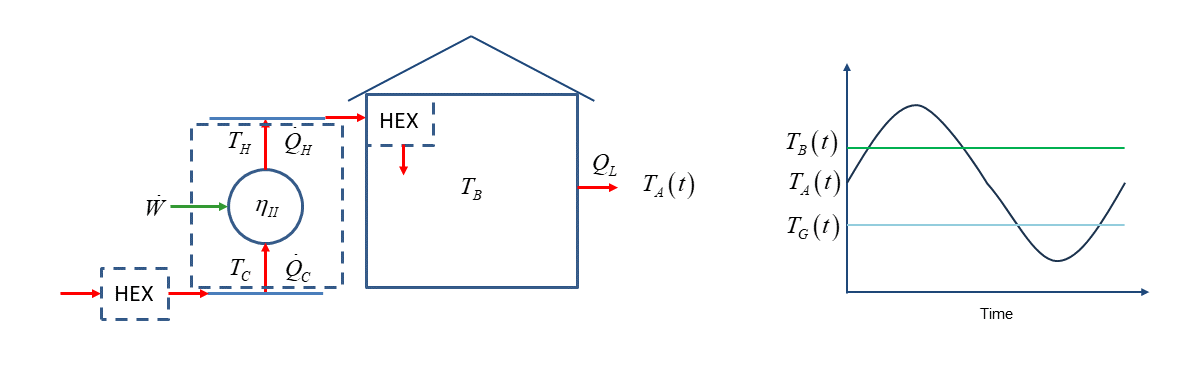

# Performance
The actual power input to the heat pump is related to the ideal by the efficiency,

\begin{equation}
\dot{W}_{act}=\frac{\dot{W}_{rev}}{\eta_{II}}
\end{equation}

The first law (in steady-state) is,

\begin{equation}
\dot{W}=\dot{Q}_{H} - \dot{Q}_{C}
\end{equation}

and the second law is,

\begin{equation}
\frac{\dot{Q}_{C}}{T_{C}}+\dot{S}_{gen}=\frac{\dot{Q}_{H}}{T_{H}}
\end{equation}

## Reversible/Ideal Heat Pump
### Combine 1st and 2nd Law
First, let us determine the reversible work by applying our 1st and 2nd Laws. In the case of an ideal heat pump (reversible), the entropy generation is zero, and the relationship between heat input and heat output is,

\begin{equation}
\dot{Q}_{C,rev}=\dot{Q}_{H}\frac{T_{C}}{T_{H}}
\end{equation}

Using first and second laws, the reversible work rate is,

\begin{equation}
\dot{W}_{rev}=\dot{Q}_{H} - \dot{Q}_{C,rev}
\end{equation}

\begin{equation}
\dot{W}_{rev}=\dot{Q}_{H}\left(1-\frac{T_{C}}{T_{H}} \right)
\end{equation}

Note: we could have started with an exergy balance and found the reversible work more directly (See Part II).

## Actual Heat Pump
The actual power input is a function of the heat transfer to the building. Assuming there is no thermal inertia in the building, $\dot{Q}_{H} = \dot{Q}_{L}$ and the power input is written,

\begin{equation}
\dot{W}_{act}(t)=\frac{C(T_{B} - T_{A}(t))}{\eta_{II}} \left( 1-\frac{T_{C}}{T_{B}} \right)
\end{equation}

# HP Power
Assume the building temperature is 20 C. In the case of the ASHP, the temperature of the heat source is the ambient temperature, $T_{C}=T_{A}$. In the case of the GSHP, we will assume a constant ground temperature, $T_{C}=T_{G}$.

Let's explore the power input for arbitrary $T_{0}$ and ${\delta T}$ and include a deadband so the heat pump does not operate until a set temperature difference between building and ambient is exceeded.

In [2]:
# @title
# Set parameter values
# a year
T0 = 25 # C mean ambient temperature
DT= 10 # C amplitude of ambient temperature change

# a winter day
#T0 = 0 # C mean ambient temperature
#DT= 7 # C amplitude of ambient temperature change

TB= 20 # C building set-point
TG=7 # C mean ground temperature
DTG=1 # C amplitude of ground temp variation

effic=0.45 # 2nd law efficiency of heat pump
C=0.5 # kW/K building envelope conductance
DB = 4 # C deadband for heat pump operation

param_list=[TB, TG, effic, C, DB]

# create an array of times
t_pts=np.linspace(0,1,50)

# create arrays of temperatures for each time
TA_t=T0+DT*np.sin(2*np.pi*t_pts)
TB_t=TB*np.ones(len(TA_t))
#TG_t=TG*np.ones(len(TA_t))
TG_t=TG+DTG*np.sin(2*np.pi*t_pts)

In [3]:
# @title
# Create a function to generate a power time series

def HP_power(param_list, TA_t, TG_t):
    # unpack parameters
    TB= param_list[0]
    TG= param_list[1]
    effic= param_list[2]
    C= param_list[3]
    DB = param_list[4]

    n=np.arange(len(TA_t))
    # determine the power input for each heat pump
    W_ASHP=[C*(TB-TA_t[i])/effic*(1-TA_t[i]/TB) if (abs(TA_t[i]-TB) > DB) else 0 for i in n]
    W_GSHP=[C*(TB-TA_t[i])/effic*(1-TG_t[i]/TB) if (abs(TA_t[i]-TB) > DB) else 0 for i in n]

    return [W_ASHP, W_GSHP]

[W_ASHP, W_GSHP]=HP_power(param_list,TA_t,TG_t)

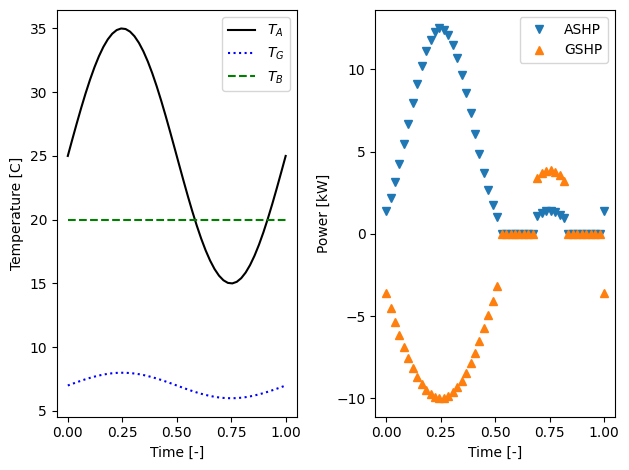

In [4]:
# @title
# plot the results
# two plots on one row
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.set_xlabel('Time [-]')
ax1.set_ylabel('Temperature [C]')
ax1.plot(t_pts, TA_t, '-k', label='$T_{A}$')
ax1.plot(t_pts, TG_t, ':b', label='$T_{G}$')
ax1.plot(t_pts, TB_t, '--g', label='$T_{B}$')

ax2.set_xlabel('Time [-]')
ax2.set_ylabel('Power [kW]')
ax2.plot(t_pts, W_ASHP, 'v', label='ASHP')
ax2.plot(t_pts, W_GSHP, '^', label='GSHP' )

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Discussion
Based on the assumed temperatures, the air source heat pump has a higher peak power than the GSHP. We also see the ASHP acting as an air conditioner when the ambient temperature is high. The GSHP peak power is lower due to the smaller temperature difference between the building and the ground. The GSHP power requirement exceeds the ASHP where the temperature difference between the building and the air is smaller than the difference between the building and the ground.

Why do we see negative powers for the GSHP? In theory, when the ambient temperature is higher than the building set-point, heat is available at a higher temperature than the ground (i.e. we have a hot reservoir and a cold reservoir connected by a heat engine), power can be generated. We don't see this behaviour with the ASHP because the source of heat flow into the building is the same reservoir heat is rejected to - i.e. the heat pump is still pumping heat from low temperature, $T_{B}$ to high temperature, $T_{A}$.

In reality, a suitably designed GSHP could provide space cooling by heat transfer between the building and the ground, but some pumping power would be needed to circulate heat transfer fluid through the HEXs. To ensure suitable rates of heat transfer, the GSHP might be run in reverse to develop and appropriate temperature differnece across the two heat exchangers. So, in this case, power input would still be positive (there would be no negative power flows i.e. power generation.)

## Preferred Technology
One might wonder under what conditions an ASHP is more efficient than a GSHP. We can explore this by defining a relative efficiency metric $\epsilon$ as,

\begin{equation} \label{eq:eff_rel}
\epsilon=\frac{ \dot{W}_{ASHP} }{ \dot{W}_{GSHP} }
\end{equation}

Because $Q_{H}$ is the same for both ASHP and GSHP, the relative efficiency is,

\begin{equation} \label{eq:eff_rel2}
\epsilon=\frac{ 1 - \frac{T_{A}}{T_{B}} }{1 - \frac{T_{G}}{T_{B}} }=\frac{T_{B}-T_{A}}{T_{B}-T_{G}}
\end{equation}

Substituting the assumed air temperature,

\begin{equation} \label{eq:eff_rel3}
\epsilon=\frac{T_{B}-T_{0}}{T_{B}-T_{G}}-\frac{\Delta T}{T_{B}-T_{G}} \sin \left( 2 \pi t \right)
\end{equation}

When the relative efficiency is less than one, an ASHP requires less work. Thus, averaging over a heating day (assuming the air temperature profile is a winter day),

\begin{equation} \label{eq:eff_rel4}
\epsilon_{0} = \frac{T_{B}-T_{0}}{T_{B}-T_{G}}
\end{equation}

The ASHP is preferred if the temperature difference between the building and the air is less than the building and the ground.

# Summary
A steady-state comparison of a heat-pump for building heating uses combined 1st and 2nd Laws of thermodynamics. A direct application of an exergy balance and 2nd law can also be used. The performance of an ASHP and GSHP are compared. The preferred technology choice depends on the relative temperature differences between the building, the ambient, and the ground.